# Q. Prepare a prediction model for profit of 50_startups data.

* Do transformations for getting better predictions of profit and
  make a table containing R^2 value for each prepared model.
* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
strtup_data = pd.read_csv('50_Startups.csv')
strtup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


###  Prediction model for  50 startups

* Input : R&D Spend,Administration,Marketing Spend,State
* Output : Profit

In [3]:
strtup_data.shape

(50, 5)

In [4]:
strtup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
strtup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

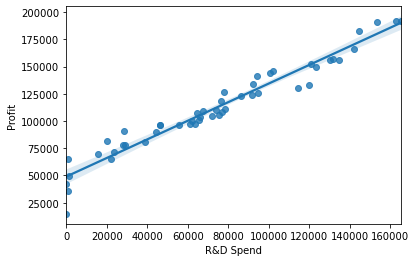

In [6]:
sns.regplot(x='R&D Spend',y='Profit',data=strtup_data)

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

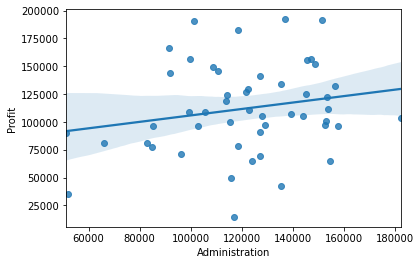

In [7]:
sns.regplot(x='Administration',y='Profit',data=strtup_data)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

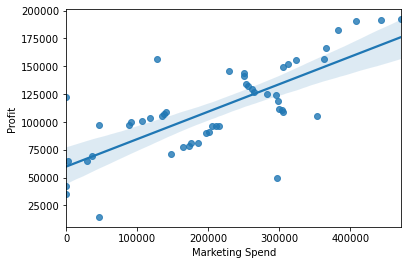

In [8]:
sns.regplot(x='Marketing Spend',y='Profit',data=strtup_data)

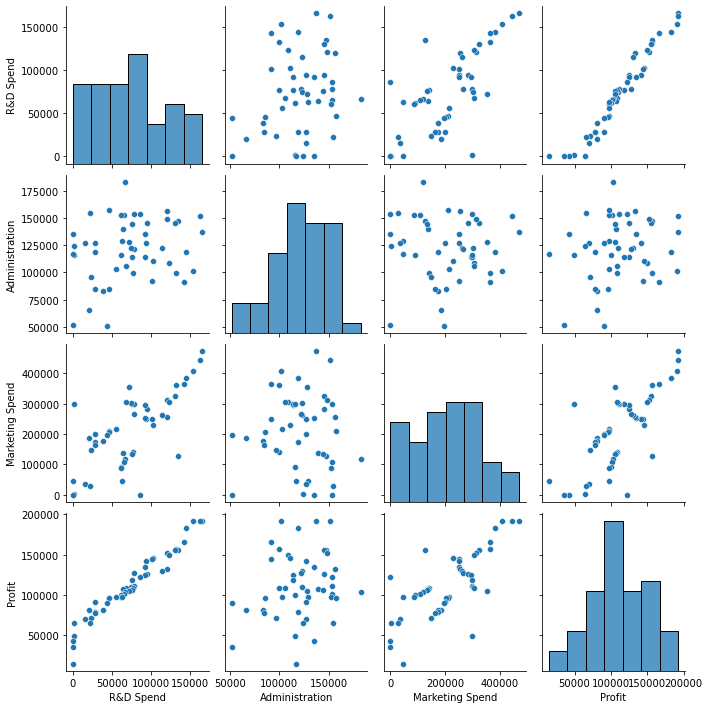

In [9]:
sns.pairplot(data=strtup_data)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
strtup_data['encoded_State'] = le.fit_transform(strtup_data['State'])

In [12]:
del strtup_data['State']
strtup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


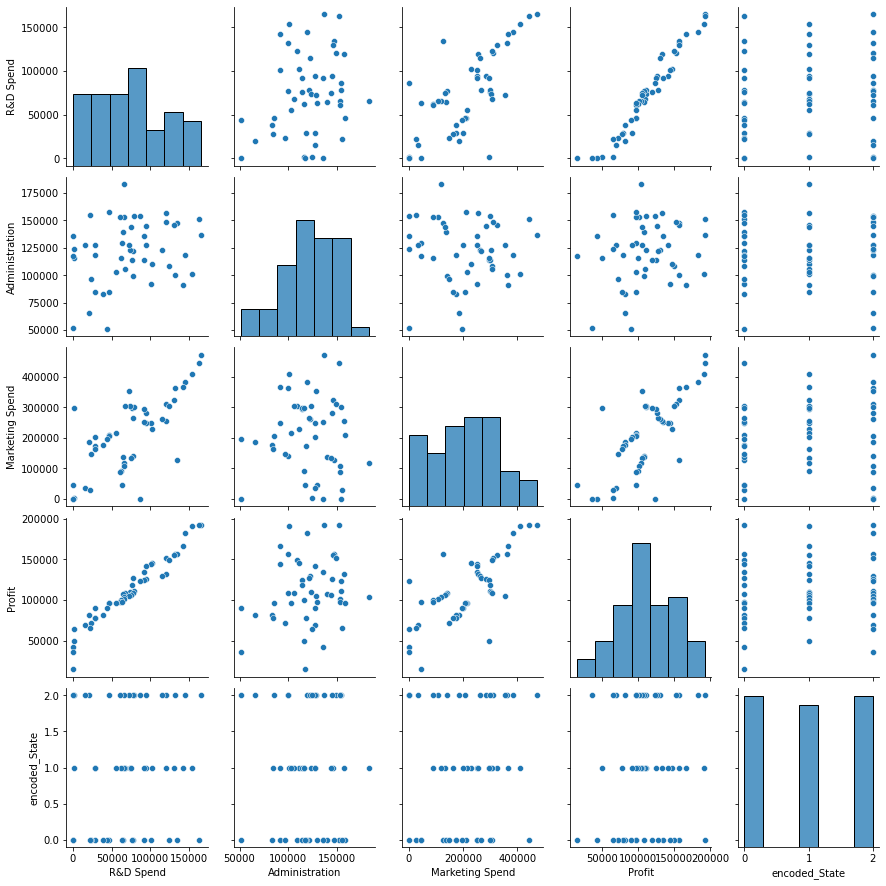

In [13]:
sns.pairplot(data=strtup_data)

In [14]:
strtup_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
encoded_State,0.104685,0.011847,0.077670,0.101796,1.000000


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
strtup_transformed = StandardScaler()
strtup_transformed = strtup_transformed.fit_transform(strtup_data)

In [17]:
strtup_transformed

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.01120333e+00,  1.21267813e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.99942997e+00, -1.21267813e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.98084225e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.77662724e+00,  1.21267813e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.35774012e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.12724963e+00,  1.21267813e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.10548055e+00, -1.21267813e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.09620987e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.00746967e+00,  1.21267813e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         9.46022467e-01

In [18]:
strtup_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'encoded_State'],
      dtype='object')

In [19]:
strtup_transformed = pd.DataFrame(data=strtup_transformed,columns=[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit','encoded_State']])
strtup_transformed

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
0,2.016411,0.560753,2.153943,2.011203,1.212678
1,1.955860,1.082807,1.923600,1.999430,-1.212678
2,1.754364,-0.728257,1.626528,1.980842,0.000000
3,1.554784,-0.096365,1.422210,1.776627,1.212678
4,1.504937,-1.079919,1.281528,1.357740,0.000000
5,1.279800,-0.776239,1.254210,1.127250,1.212678
6,1.340066,0.932147,-0.688150,1.105481,-1.212678
7,1.245057,0.871980,0.932186,1.096210,0.000000
8,1.030369,0.986952,0.830887,1.007470,1.212678
9,1.091819,-0.456640,0.776107,0.946022,-1.212678


### Model-1 on input:
* R&D Spend', 'Administration', 'Marketing Spend', 'encoded_State'

In [20]:
X = strtup_transformed[['R&D Spend', 'Administration', 'Marketing Spend', 'encoded_State']]
y = strtup_transformed[['Profit']]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 4), (10, 4), (40, 1), (10, 1))

In [23]:
strt_LRModel = LinearRegression()
strt_LRModel.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = strt_LRModel.predict(X_test)
y_pred

array([[-1.34623363],
       [-0.95980147],
       [-0.25940631],
       [-1.05958716],
       [ 1.0745356 ],
       [-0.96532463],
       [ 1.51945753],
       [-0.33299785],
       [ 0.40052723],
       [ 1.74907922]])

In [25]:
print("R2 Score :",round(r2_score(y_test,y_pred),4))
print("MSE      :",round(mean_squared_error(y_test,y_pred),4))

R2 Score : 0.9598
MSE      : 0.045


### Model-2 on input:
* R&D Spend', 'Administration', 'Marketing Spend'

In [26]:
X1 = strtup_transformed[['R&D Spend', 'Administration', 'Marketing Spend']]
y=strtup_transformed[['Profit']]
X1

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [27]:
X1_train,X1_test,y_train,y_test= train_test_split(X1,y,test_size=0.20)
X1_train.shape,X1_test.shape,y_train.shape,y_test.shape

((40, 3), (10, 3), (40, 1), (10, 1))

In [28]:
strt_LRModel1 = LinearRegression()
strt_LRModel1.fit(X1_train,y_train)

LinearRegression()

In [29]:
y_pred1 = strt_LRModel1.predict(X1_test)
y_pred1

array([[-1.66789077],
       [-0.60345733],
       [ 0.10098555],
       [ 2.02340969],
       [ 0.36559434],
       [ 0.56642945],
       [-0.59484564],
       [-0.96916709],
       [-1.42036668],
       [-0.38245902]])

In [30]:
print("R2 Score :",round(r2_score(y_test,y_pred1),4))
print("MSE      :",round(mean_squared_error(y_test,y_pred1),4))

R2 Score : 0.9516
MSE      : 0.0493


In [31]:
from pickle import dump

In [32]:
dump(strt_LRModel,open("strt_LRM.pkl",'wb'))

In [33]:
dump(strt_LRModel1,open("strt_LRM1.pkl",'wb'))

In [34]:
from pickle import load

In [35]:
loaded_model = load(open('strt_LRM.pkl','rb'))
loaded_model1 = load(open('strt_LRM1.pkl','rb'))

In [36]:
loaded_model.predict(X_test)

array([[-1.34623363],
       [-0.95980147],
       [-0.25940631],
       [-1.05958716],
       [ 1.0745356 ],
       [-0.96532463],
       [ 1.51945753],
       [-0.33299785],
       [ 0.40052723],
       [ 1.74907922]])

In [37]:
loaded_model1.predict(X1_test)

array([[-1.66789077],
       [-0.60345733],
       [ 0.10098555],
       [ 2.02340969],
       [ 0.36559434],
       [ 0.56642945],
       [-0.59484564],
       [-0.96916709],
       [-1.42036668],
       [-0.38245902]])

# -------------------------------------------------xxx----------------------------------------------